### ДЗ 4
Гимишян А. - М05-312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
data = pd.read_csv('Data_for4.csv')

In [3]:
# Просмотр первых нескольких строк данных
print(data.head())

   innov   new    RD  tech  export
0   0.05  0.78  0.84  0.04    0.11
1   0.25  0.05  0.05  0.83    0.01
2   0.35  0.49  0.50  0.47    0.03
3   0.05  0.70  0.88  0.02    0.07
4   0.03  0.71  0.92  0.05    0.09


In [5]:
# Информация о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   innov   1107 non-null   float64
 1   new     1107 non-null   float64
 2   RD      1107 non-null   float64
 3   tech    1107 non-null   float64
 4   export  1107 non-null   float64
dtypes: float64(5)
memory usage: 43.4 KB
None


In [6]:
# Проверка наличия пропущенных значений
print(data.isnull().sum())

innov     0
new       0
RD        0
tech      0
export    0
dtype: int64


In [7]:
# Описательная статистика
print(data.describe())

             innov          new           RD         tech       export
count  1107.000000  1107.000000  1107.000000  1107.000000  1107.000000
mean      0.244896     0.482385     0.448916     0.408500     0.131120
std       0.147293     0.287495     0.272837     0.254333     0.179268
min       0.020000     0.020000     0.030000     0.020000     0.010000
25%       0.060000     0.060000     0.110000     0.055000     0.020000
50%       0.240000     0.580000     0.470000     0.440000     0.030000
75%       0.360000     0.680000     0.680000     0.620000     0.110000
max       0.660000     0.910000     0.950000     0.860000     0.620000


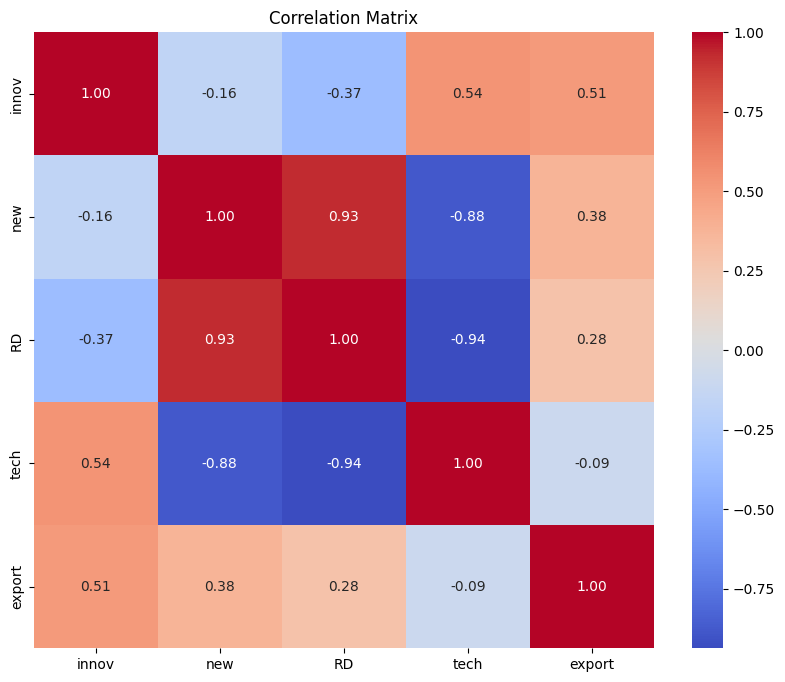

In [8]:
# Построение матрицы корреляции
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

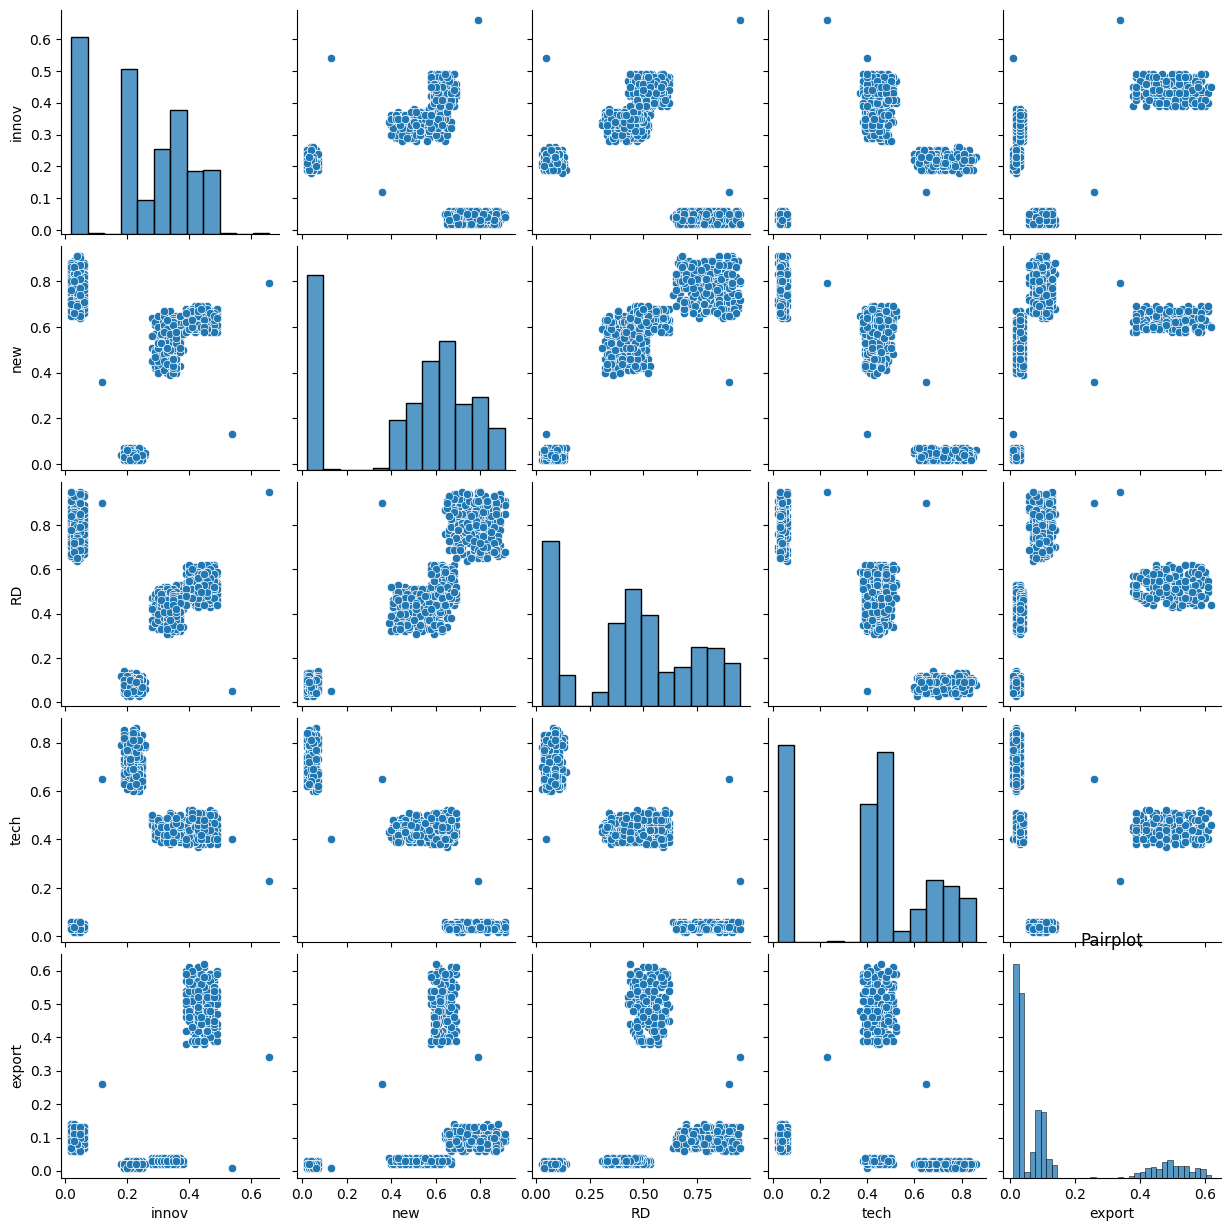

In [9]:
# Построение графиков распределения
plt.figure(figsize=(10, 6))
sns.pairplot(data)
plt.title('Pairplot')
plt.show()

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

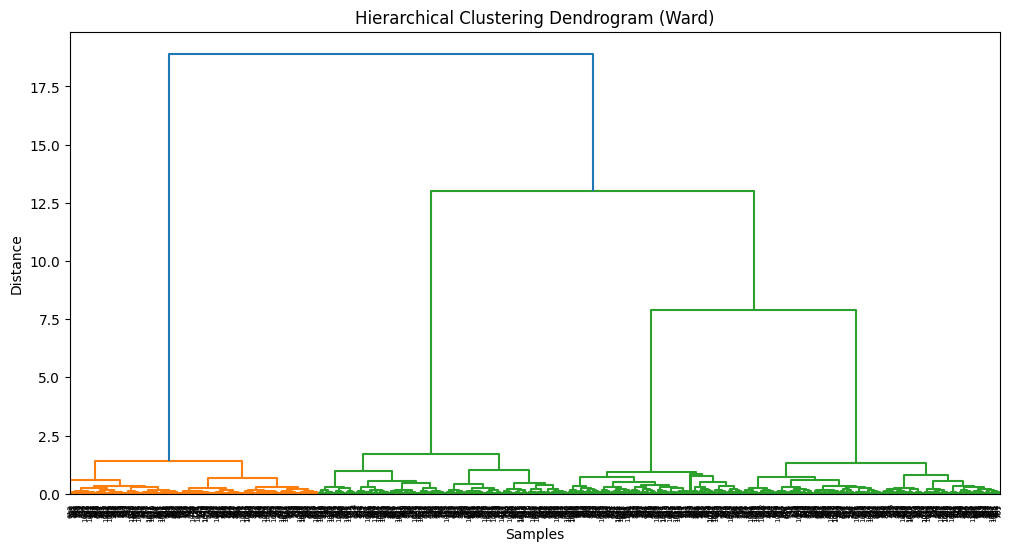

In [11]:
# Построение дендрограммы с использованием евклидова расстояния
plt.figure(figsize=(12, 6))
dendrogram(linkage(data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

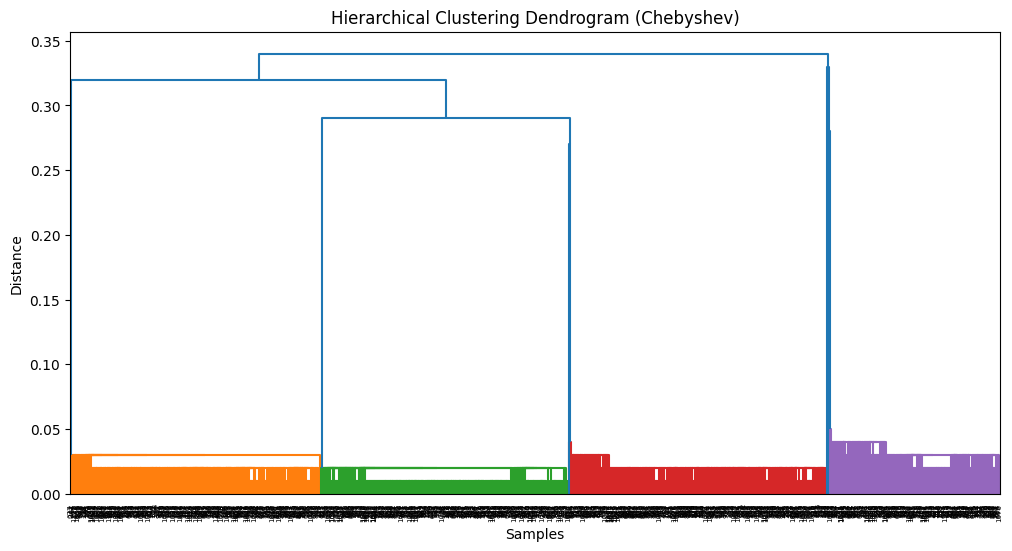

In [12]:
# Построение дендрограммы с использованием расстояния Чебышева
plt.figure(figsize=(12, 6))
dendrogram(linkage(data, method='single', metric='chebyshev'))
plt.title('Hierarchical Clustering Dendrogram (Chebyshev)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

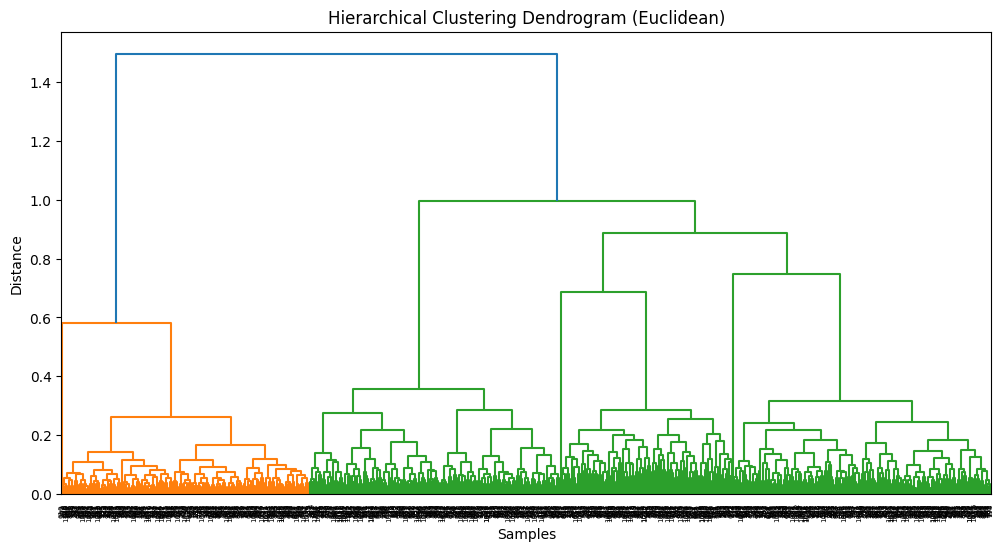

In [13]:
# Построение дендрограммы с использованием расстояния Варда
plt.figure(figsize=(12, 6))
dendrogram(linkage(data, method='complete', metric='euclidean'))
plt.title('Hierarchical Clustering Dendrogram (Euclidean)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

После этого мы можем приступить к кластеризации методами k-средних и DBSCAN. Для этого сначала нужно определить оптимальное число кластеров для метода k-средних и DBSCAN. Мы сделаем это, построив графики зависимости суммы квадратов расстояний до центров кластеров и графики коэффициентов силуэта для разного количества кластеров.

In [14]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

In [15]:
# Определение оптимального числа кластеров для k-средних
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

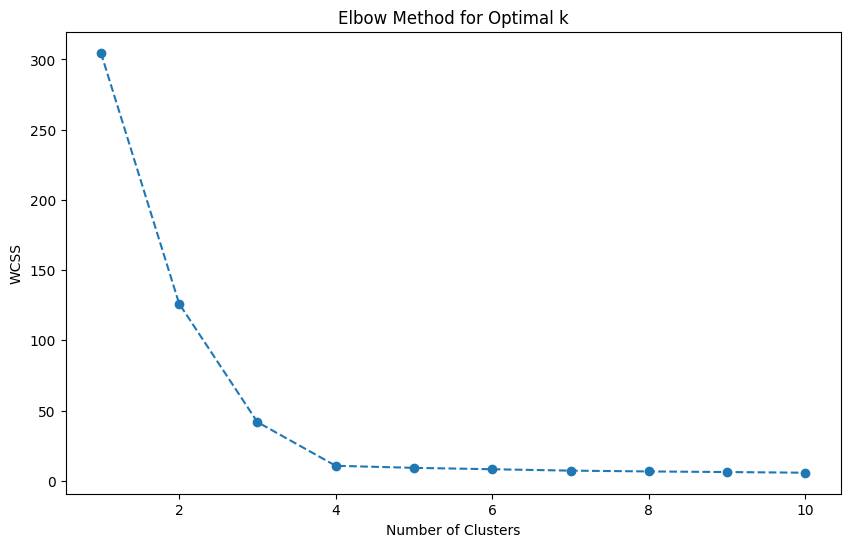

In [16]:
# Построение графика зависимости суммы квадратов расстояний от числа кластеров
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Определение оптимального числа кластеров для DBSCAN
silhouette_scores = []
eps_values = np.linspace(0.1, 1.0, num=10)
min_samples_values = range(2, 10)
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        if len(np.unique(dbscan.labels_)) > 1:  # Исключаем случаи, когда все объекты попадают в один кластер
            score = silhouette_score(data, dbscan.labels_)
            silhouette_scores.append((eps, min_samples, score))

In [18]:
# Извлечение наилучшего значения eps и min_samples
best_eps, best_min_samples, best_score = max(silhouette_scores, key=lambda x: x[2])
print(f'Best Silhouette Score: {best_score} with eps={best_eps}, min_samples={best_min_samples}')

Best Silhouette Score: 0.7913892178556475 with eps=0.1, min_samples=2


После определения оптимального числа кластеров мы можем выполнить кластеризацию с помощью выбранных алгоритмов и интерпретировать результаты.

In [19]:
# Кластеризация методом k-средних с оптимальным числом кластеров
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Кластеризация методом DBSCAN с оптимальными параметрами
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = dbscan.fit_predict(data)

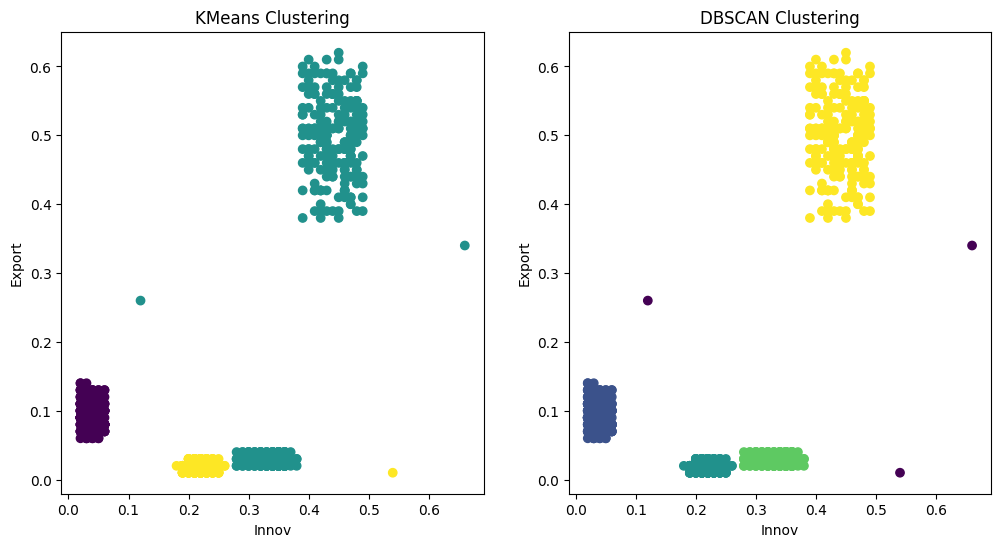

In [21]:
# Визуализация результатов кластеризации
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['innov'], data['export'], c=kmeans_clusters, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Innov')
plt.ylabel('Export')

plt.subplot(1, 2, 2)
plt.scatter(data['innov'], data['export'], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Innov')
plt.ylabel('Export')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

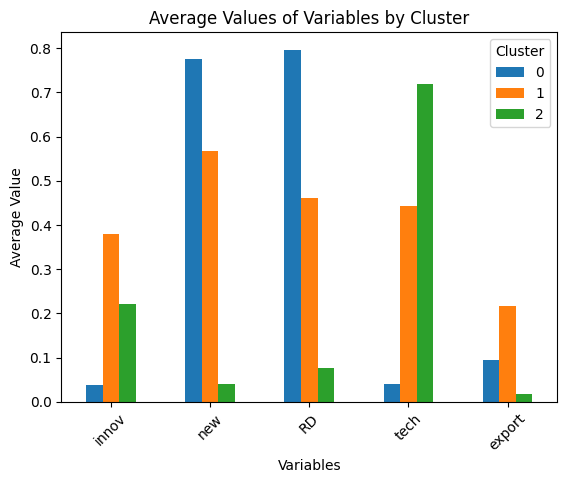

In [22]:
# Выполнение кластеризации методом k-средних с выбранным числом кластеров
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(data)

# Добавление меток кластеров к данным
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = kmeans_clusters

# Вычисление средних значений переменных для каждого кластера
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Построение графика средних значений
plt.figure(figsize=(10, 6))
cluster_means.T.plot(kind='bar')
plt.title('Average Values of Variables by Cluster')
plt.xlabel('Variables')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

- **Кластер 0**: В этом кластере уровень инновационных продаж (innov) низкий, высок процент новых продуктов на рынке (new) и затраты на исследования и разработки новой продукции (RD). Этот кластер можно охарактеризовать как кластер, где компании имеют значительный потенциал для инноваций, но испытывают трудности с их коммерциализацией или маркетингом. "Начальный уровень инноваций".

- **Кластер 1**: В этом кластере уровень инновационных продаж (innov) и export выше, чем в кластере 0. Затраты на исследования и разработки новой продукции (RD) ниже, но приобретение технологий (tech) существенно выше, чем в кластере 0. Этот кластер можно описать как "стабильный уровень инноваций", где компании проявляют некоторую активность в разработке и внедрении новых продуктов.

- **Кластер 2**: Этот кластер характеризуется самыми низкими значениями переменных export и new, а также низкими затратами на исследования и разработки новой продукции (RD). Этот кластер можно охарактеризовать как "средний уровень инноваций", где компании мало вкладывают в разработку новых продуктов и технологий, и они ориентированы на стабильные продукты и рынки.

<Figure size 1000x600 with 0 Axes>

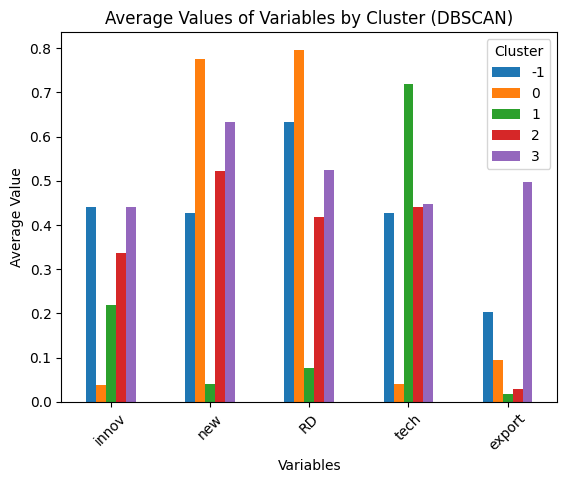

In [23]:
# Кластеризация методом DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = dbscan.fit_predict(data)

# Добавление меток кластеров к данным
data_with_dbscan_clusters = data.copy()
data_with_dbscan_clusters['Cluster'] = dbscan_clusters

# Вычисление средних значений переменных для каждого кластера
dbscan_cluster_means = data_with_dbscan_clusters.groupby('Cluster').mean()

# Построение графика средних значений
plt.figure(figsize=(10, 6))
dbscan_cluster_means.T.plot(kind='bar')
plt.title('Average Values of Variables by Cluster (DBSCAN)')
plt.xlabel('Variables')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

### Общий вывод по работе

Кластеризация позволила выделить три различных типа компаний по их инновационному поведению. Кластер 0, характеризующийся низким уровнем инновационных продаж, но высоким процентом новых продуктов на рынке и затратами на исследования и разработки новой продукции, может быть интерпретирован как "начальный уровень инноваций", где компании имеют потенциал для инноваций, но испытывают трудности с их коммерциализацией или маркетингом. Кластер 1, с высоким уровнем инновационных продаж и экспорта, ниже затратами на исследования и разработки новой продукции, но с существенно высоким приобретением технологий, можно описать как "стабильный уровень инноваций", где компании проявляют активность в разработке и внедрении новых продуктов. Наконец, кластер 2, с самыми низкими значениями переменных экспорта и новых продуктов на рынке, а также низкими затратами на исследования и разработки новой продукции, представляет собой "средний уровень инноваций", где компании мало инвестируют в разработку новых продуктов и технологий, ориентируясь на стабильные продукты и рынки. Эти результаты помогут понять характер инновационной деятельности компаний и определить стратегии развития в соответствии с их потребностями и возможностями.